IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

IMPORTING CSV FILE USING PANDAS.

In [2]:
cancer = pd.read_csv("cancer_data.csv.csv")

PRINT FIRST FIVE ROWS TO CHECK FILE IS UPLOADED SUCCESSFULLY

In [3]:
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


PRINTING INFORMATION

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


VISUALISATION BY MATPLOTLIB

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'mean_radius'}>,
        <AxesSubplot: title={'center': 'mean_texture'}>],
       [<AxesSubplot: title={'center': 'mean_perimeter'}>,
        <AxesSubplot: title={'center': 'mean_area'}>],
       [<AxesSubplot: title={'center': 'mean_smoothness'}>,
        <AxesSubplot: title={'center': 'diagnosis'}>]], dtype=object)

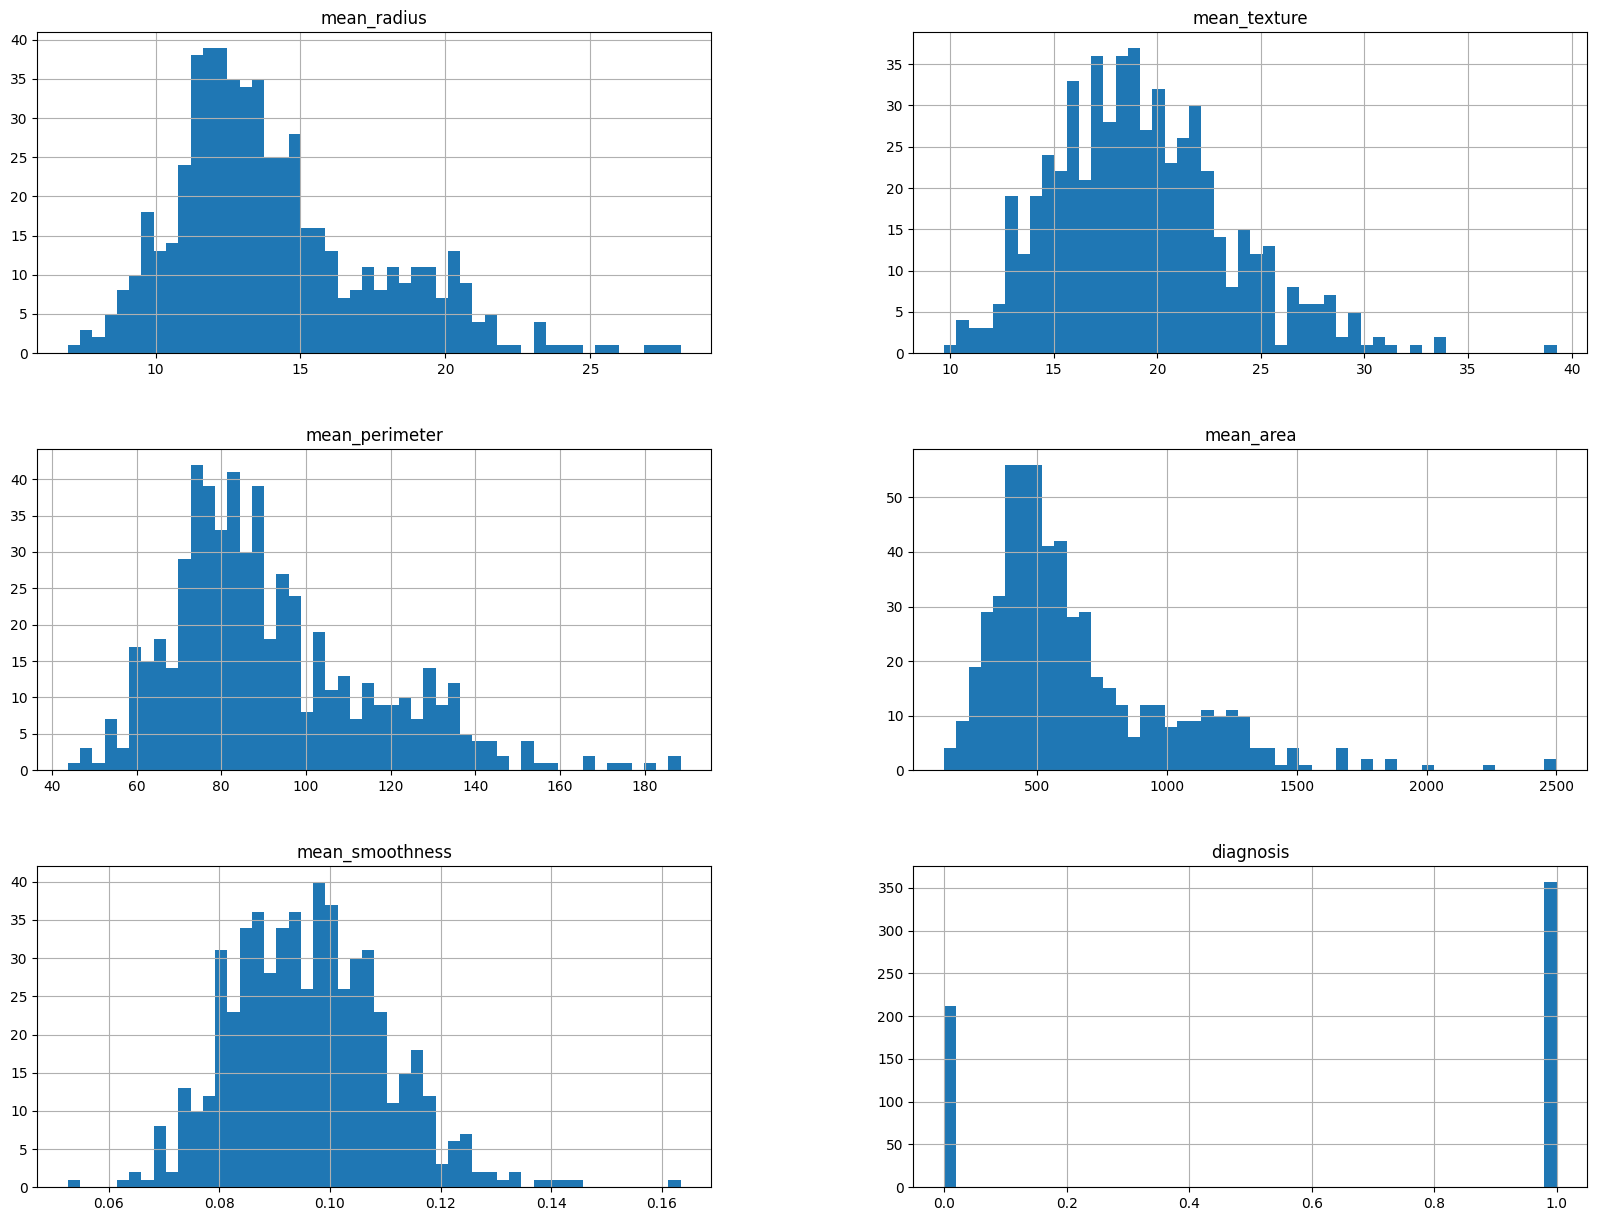

In [8]:
cancer.hist(bins=50, figsize=(20,15))

In [10]:
cancer['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

1 = with cancer, 
2 = without cancer

SPLITTING THE FEATURES AND DIAGNOSIS

In [12]:
x = cancer.drop(columns='diagnosis',axis=1)
y = cancer['diagnosis']

In [18]:
print(x)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [14]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


SPLITTING THE DATA INTO TRAINNING DATA AND TEST DATA

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(569, 5) (455, 5) (114, 5)


MODEL TRAINNING

Logistic Regression

In [1]:
model = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

trainning the logistic regression model with trainning data

In [25]:
model.fit(x_train, y_train)

C:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUATION

Accuracy score

1. accuracy on trainning data

In [26]:
x_train_predction = model.predict(x_train)
trainning_data_accuracy = accuracy_score(x_train_predction, y_train)
print('Accuracy on trainning data:', trainning_data_accuracy)

Accuracy on trainning data: 0.9120879120879121


2. accuracy on test data

In [27]:
x_test_predction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predction, y_test)
print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.9035087719298246


BUILDING A PREDICTIVE SYSTEM

In [30]:
input_data = (13.03,18.42,82.61,523.8,0.08983)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
predction = model.predict(input_data_reshape)

C:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
print(predction)

[1]


Here, 1 means the dataset shows that the person is diseased